In [3]:
import pandas as pd
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt
import os
from torchvision import transforms, datasets
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import math
from sklearn.model_selection import train_test_split

In [12]:
train = pd.read_csv("/home/udit/kannada_mnist/kannada_mnist/data/train.csv")
test = pd.read_csv("/home/udit/kannada_mnist/kannada_mnist/data/Dig-MNIST.csv")
submission_set = pd.read_csv("/home/udit/kannada_mnist/kannada_mnist/data/test.csv").iloc[:,1:]


In [14]:
train_data = train.drop("label", axis=1)
train_targets = train["label"]

In [15]:
test_images = test.drop("label", axis=1)
test_labels = test["label"]

In [18]:
train_images, val_images, train_labels, val_labels = train_test_split(train_data, train_targets, test_size=0.2)

In [23]:
train_images.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)

val_images.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

test_images.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)


transformations for the train, validation and test sets

In [26]:
# Transformations for the train
train_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.RandomCrop(28),
    transforms.RandomAffine(degrees=5, translate=(0.1, 0.1)),
    transforms.ToTensor(), # divides by 255
  #  transforms.Normalize((0.5,), (0.5,))
]))

In [27]:
# Transformations for the validation & test sets
val_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.ToTensor(), # divides by 255
   # transforms.Normalize((0.1307,), (0.3081,))
]))

create dataset

In [38]:
class KannadaDataSet(torch.utils.data.Dataset):
    def __init__(self, images, labels, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
        
    def __len__(self):
        return(len(self.X))
    
    def __getitem__(self, i):
        data = self.X.iloc[i, :]
        data = np.array(data).astype(np.uint8).reshape(28,28,1)
        
        if self.transforms:
            data = self.transforms(data)
        if self.y is not None:
            return(data, self.y[i])
        else:
            return data

In [40]:
batch_size = 128

train_data = KannadaDataSet(train_images, train_labels, train_trans)
val_data = KannadaDataSet(val_images, val_labels, val_trans)
test_data = KannadaDataSet(test_images, test_labels, val_trans)
submission_data = KannadaDataSet(submission_set, None, val_trans)

Create dataloader

In [41]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
submission_loader = torch.utils.data.DataLoader(submission_data, batch_size=batch_size, shuffle=False)

classes = ('0', '1','2','3','4','5','6','7','8','9')

Plotting a single dataframe

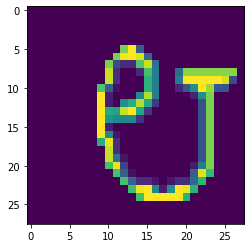

In [56]:
plt.imshow(train_data[20][0][0, :, :])